In [1]:
import numpy as np
import json
from utilities import *
from OFDMparam import *
from CFOcorr import *
from getModFeat import *
import random

import matplotlib.pyplot as plt
pi = math.pi


In [49]:
SNRVec = np.arange(40, 41, 2, dtype=int)
FFTsize = 4096
tauVec = np.array([64, 256, 512, 1024, 2048])
CPLenList = [[16, 8], [64, 32, 16], [128, 36], [72], [144]]
CPOptList = np.array([np.array(['Extended', 'Normal']),\
    np.array(['Extended', 'Medium', 'Normal']),\
    np.array(['Extended', 'Normal']),\
    np.array(['Normal']), np.array(['Normal'])], dtype=object)
protocolList = np.array(['wlanHT', 'wlanHE', 'NRDLa', 'NRDLb', 'NRDLc'])

In [3]:
f = open('/project/iarpa/dataset/cyclo_modul_OFDM/simulation/wlanHT/wlanHT_Extended_16qam/wlanHT_Extended_16_0_40_20_0.4_2.metadata')
loadMetadata = json.load(f)
# print(loadMetadata['sourceArray'][0]['imperfectionCfg']['freqOffset'])


-42392.64977465874
-42392.64977465874


In [66]:
load_out = np.fromfile('/project/iarpa/dataset/cyclo_modul_OFDM/simulation/wlanHT/wlanHT_Extended_16qam/wlanHT_Extended_16_0_20_20_0.4_2.32cf',\
    dtype=np.float32)
f = open('/project/iarpa/dataset/cyclo_modul_OFDM/simulation/wlanHT/wlanHT_Extended_16qam/wlanHT_Extended_16_0_20_20_0.4_2.metadata')
loadMetadata = json.load(f)

data = load_out[np.arange(0, load_out.shape[0], 2)] +\
                    1j * load_out[np.arange(1, load_out.shape[0], 2)]

# inputIQ = data[1200:]
# print(inputIQ.shape[0])

startIndex:  5057
Truth:  63  Est:  63
6551.2100933189795
8268.589780867496


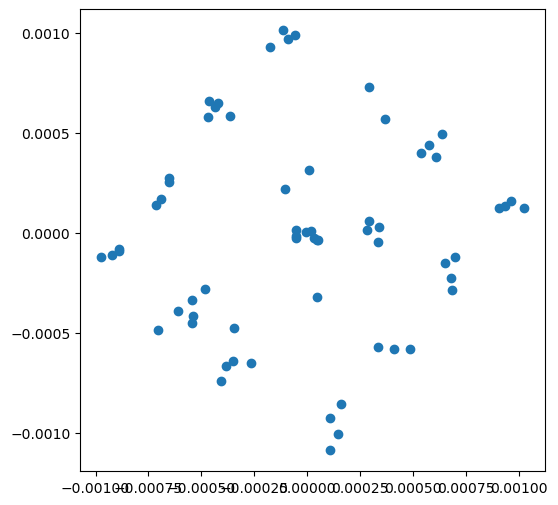

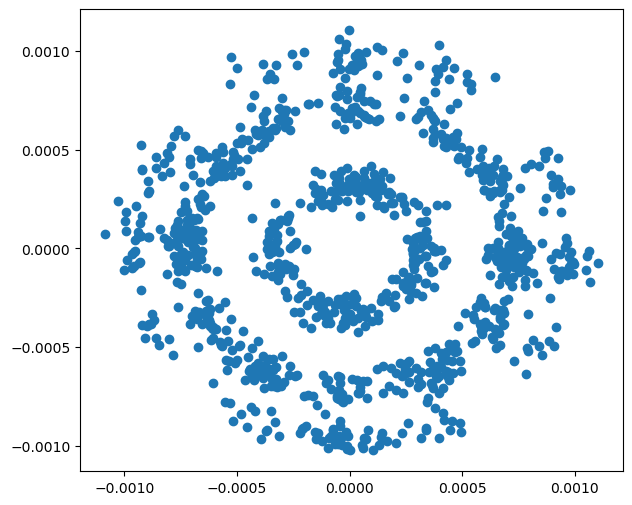

In [70]:
preambLen = 720
nSym = 20
removeNull = True
angleMod = True

startIndex = random.randint(preambLen, data.shape[0] - 2560)
print('startIndex: ', startIndex)
inputIQ = data[startIndex:]
# print(inputIQ.shape[0])
nSubC = 64
lenCP = 16
samplingRate = 20e6
firstIndexSymTruth = findFirstIndex(inputIQ, nSubC, lenCP)
firstIndexSymEst = (-startIndex+preambLen) % (nSubC+lenCP)
print('Truth: ', firstIndexSymTruth, ' Est: ', firstIndexSymEst)

CFOtruth = getCFOtruth(loadMetadata)
print(CFOtruth)
CFOest = estCFO(inputIQ, nSubC, lenCP, firstIndexSymEst, samplingRate)
print(CFOest)

inputIQ_CFO = corrCFO(inputIQ, nSubC, lenCP, firstIndexSymEst, samplingRate, 2)
a = np.fft.fft(inputIQ_CFO[firstIndexSymEst+lenCP:firstIndexSymEst+lenCP+nSubC])
plt.figure(figsize=(6,6))
plt.scatter(np.real(a), np.imag(a))

feat = getModFeat(inputIQ_CFO, nSubC, lenCP, firstIndexSymEst, nSym, removeNull, angleMod)
plt.figure(figsize=(7,6))
plt.scatter(np.real(feat), np.imag(feat))

plt.xlim((0, xylim))
plt.ylim((0, xylim*0.6))

In [95]:
np.load('./result/230326_192242/paramEst.npy', allow_pickle=True)

array([[array([[ 0., 50.],
               [ 0., 50.],
               [ 0., 50.],
               [ 0., 50.],
               [ 0., 50.],
               [ 0., 50.],
               [ 0., 50.],
               [ 0., 50.]]), array([[0., 0., 0.],
                                    [0., 0., 0.],
                                    [0., 0., 0.],
                                    [0., 0., 0.],
                                    [0., 0., 0.],
                                    [0., 0., 0.],
                                    [0., 0., 0.],
                                    [0., 0., 0.]]), array([[0., 0.],
                                                           [0., 0.],
                                                           [0., 0.],
                                                           [0., 0.],
                                                           [0., 0.],
                                                           [0., 0.],
                                               

In [56]:
preambleLen = 720
loadedNp = np.load('./result/230326_224855/result.npy', allow_pickle=True)
# print(loadedNp[0, :, 1])
loadedNp[0][:, 4] = (-1 * loadedNp[0][:, 4]) % 72
print(loadedNp[0][:, :])

[['wlanHT_Normal_2_0_20_20_0.4_29' 64 8 ... 8 29008.918157799955 0]
 ['wlanHT_Normal_2_0_35_20_0.4_5' 64 8 ... 7 -43802.55759445441 0]
 ['wlanHT_Normal_2_0_20_20_0.4_7' 64 8 ... 63 -51177.62719227465 0]
 ...
 ['wlanHT_Normal_2_0_40_20_0.4_30' 64 8 ... 4 57914.982138170875 0]
 ['wlanHT_Normal_2_0_20_20_0.4_19' 64 8 ... 8 57332.62341307366 0]
 ['wlanHT_Normal_2_0_35_20_0.4_44' 64 8 ... 47 22296.722289942787 0]]
